# Import necessary dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import model_evaluation_utils as meu
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,roc_auc_score,classification_report
%matplotlib inline

# Load and Merge datasets

In [2]:
white_wine = pd.read_csv('winequality-white.csv', sep=';')
red_wine = pd.read_csv('winequality-red.csv', sep=';')

red_wine['wine_type'] = 'red'   # add a column for the type
white_wine['wine_type'] = 'white'
wines = pd.concat([red_wine, white_wine])
wines['quality_label'] = wines['quality'].apply(lambda value: 'low' if value <= 5 else 'medium' if value <= 7 else 'high')
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

In [3]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium


# Predicting Wine Types

## Prepare Training and Testing datasets

In [4]:
wtp_features = wines.iloc[:,:-3]
wtp_feature_names = wtp_features.columns
wtp_class_labels = np.array(wines['quality_label'])

X_train, X_test, y_train, y_test = train_test_split(wtp_features, wtp_class_labels, 
                                                                    test_size=0.3, random_state=42)

print(Counter(y_train), Counter(y_test))
print('Features:', list(wtp_feature_names))

Counter({'medium': 2737, 'low': 1666, 'high': 144}) Counter({'medium': 1178, 'low': 718, 'high': 54})
Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


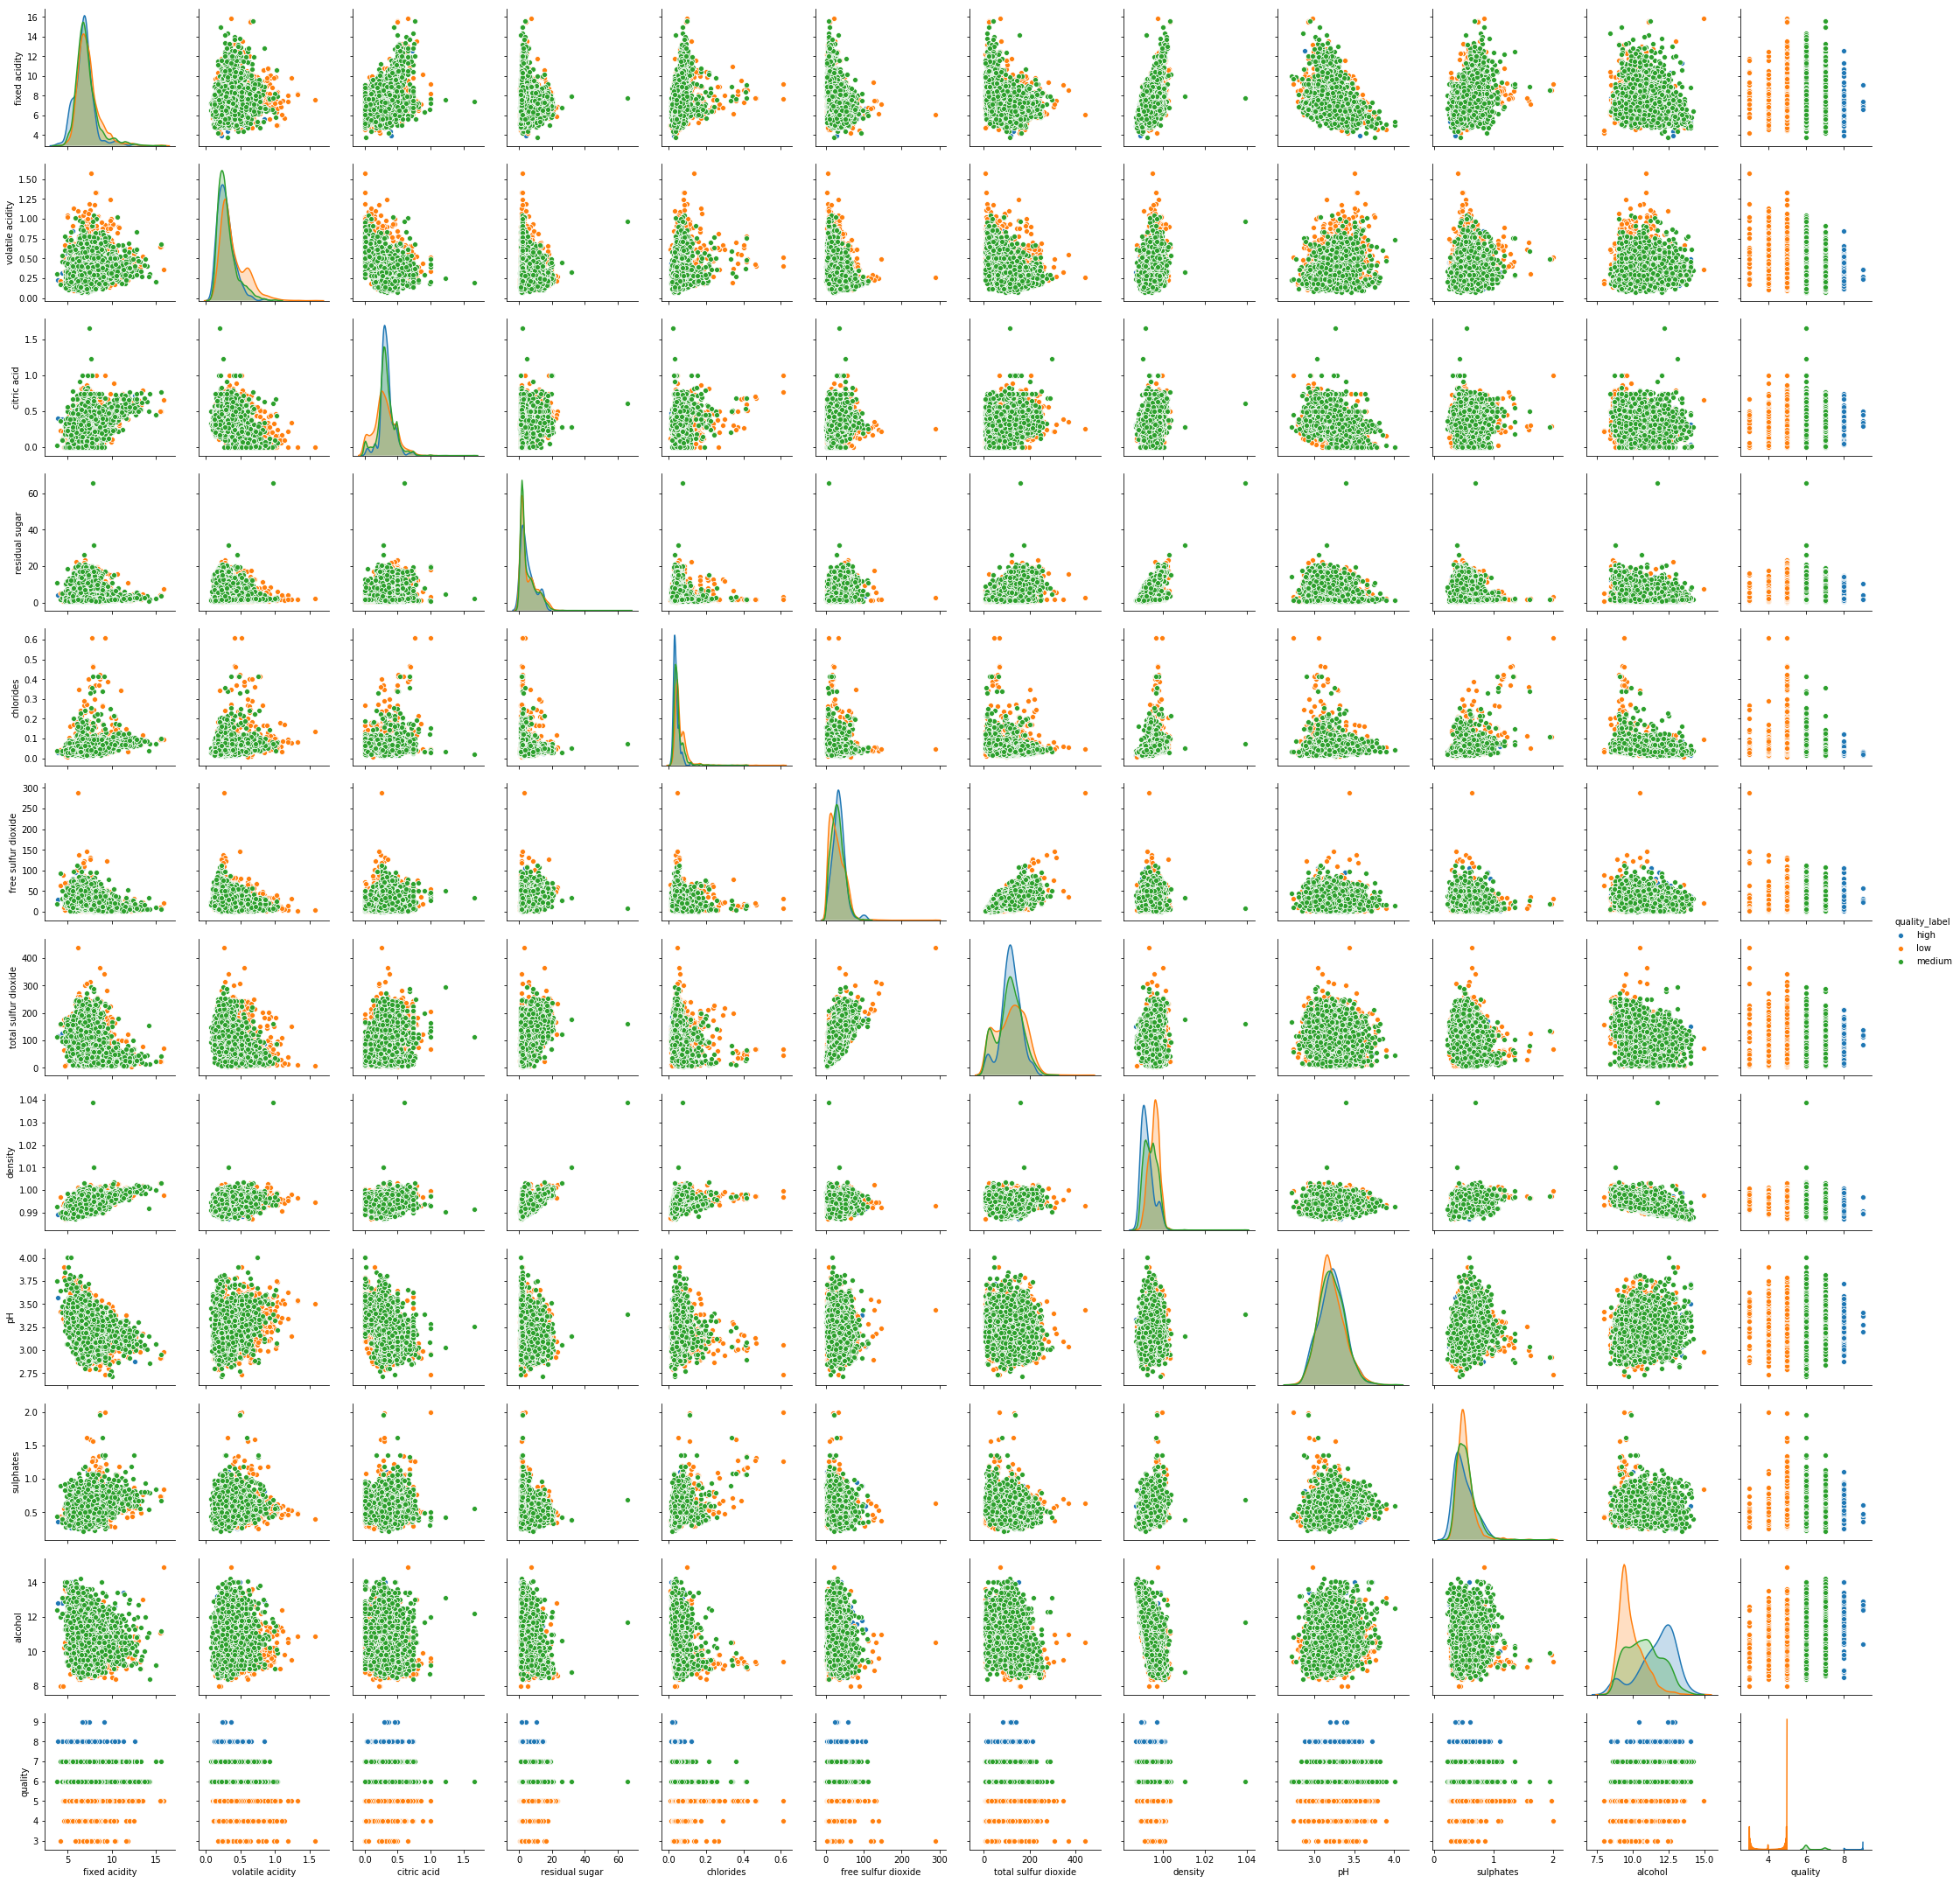

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(wines,diag_kind='kde',hue='quality_label')

In [6]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
rf.feature_importances_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.07021887, 0.10945056, 0.07969932, 0.07861446, 0.09642891,
       0.08541018, 0.08767754, 0.09071103, 0.07709173, 0.08115857,
       0.14353883])

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
#Most Basic Model. No Tuning
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
knn=GradientBoostingClassifier(random_state=0)
sc=StandardScaler()
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
# scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)
knn.fit(scaledX_train,y_train)
print("What is the Testing Accuracy")
print(knn.score(scaledX_test,y_test))
print("What is the Training Accuracy")
print(knn.score(scaledX_train,y_train))
predicted = knn.predict(scaledX_test)
print(confusion_matrix(y_test,predicted))

What is the Testing Accuracy
0.7502564102564102
What is the Training Accuracy
0.8025071475698262
[[  4   1  49]
 [  2 463 253]
 [  3 179 996]]


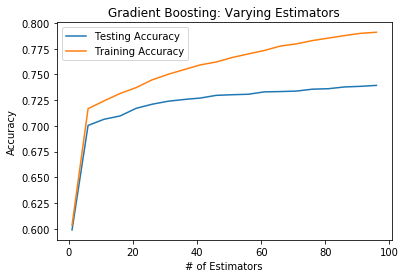

In [33]:
from matplotlib import pyplot as plt
import numpy as np
X=wtp_features
y=wtp_class_labels
neighbors = np.arange(1, 100 , 5)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test = []
    for j in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=j)
        sc=StandardScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = GradientBoostingClassifier(n_estimators=k)
        knn.fit(scaledX_train,y_train)
        train.append(knn.score(scaledX_train,y_train))
        test.append(knn.score(scaledX_test,y_test))
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)
# Generate plot
plt.title('Gradient Boosting: Varying Estimators')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('# of Estimators')
plt.ylabel('Accuracy')
plt.show()

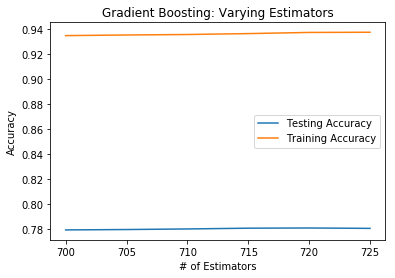

In [44]:
#Iteration 2 with a higher range
from matplotlib import pyplot as plt
import numpy as np
X=wtp_features
y=wtp_class_labels
neighbors = np.arange(700, 730 , 5)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test = []
    for j in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=j)
        sc=StandardScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = GradientBoostingClassifier(n_estimators=k,random_state=0)
        knn.fit(scaledX_train,y_train)
        train.append(knn.score(scaledX_train,y_train))
        test.append(knn.score(scaledX_test,y_test))
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)
# Generate plot
plt.title('Gradient Boosting: Varying Estimators')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('# of Estimators')
plt.ylabel('Accuracy')
plt.show()

In [45]:
print(knn.predict(scaledX_test))
print(knn.predict_proba(scaledX_test))

['high' 'low' 'medium' ... 'medium' 'medium' 'low']
[[8.29033410e-01 3.84295082e-02 1.32537082e-01]
 [2.12713240e-04 6.04234280e-01 3.95553006e-01]
 [1.64523790e-05 3.47362893e-01 6.52620654e-01]
 ...
 [1.48216110e-03 1.10469437e-01 8.88048402e-01]
 [9.62889307e-04 4.77293378e-01 5.21743732e-01]
 [2.80180302e-04 9.06106022e-01 9.36137977e-02]]


In [72]:
predicted = knn.predict(scaledX_test)
print(confusion_matrix(y_test,predicted))

[[  1   0  32]
 [  1 303 193]
 [  2 121 647]]


In [73]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

        high       0.25      0.03      0.05        33
         low       0.71      0.61      0.66       497
      medium       0.74      0.84      0.79       770

   micro avg       0.73      0.73      0.73      1300
   macro avg       0.57      0.49      0.50      1300
weighted avg       0.72      0.73      0.72      1300



In [74]:
recall_score(y_test,predicted,average=None)

array([0.03030303, 0.60965795, 0.84025974])

In [75]:
recall_score(y_test,predicted,average=None)[0]

0.030303030303030304

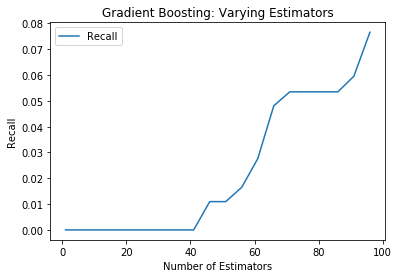

In [76]:
from matplotlib import pyplot as plt
from sklearn.metrics import recall_score
import numpy as np
X=wtp_features
y=wtp_class_labels
neighbors = np.arange(1,100,5)
recall_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    recall=[]
    for j in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=j)
        sc=StandardScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = GradientBoostingClassifier(n_estimators=k,random_state=0)
        knn.fit(scaledX_train,y_train)
        predicted = knn.predict(scaledX_test)
        recall.append(recall_score(y_test,predicted,average=None)[0])
    #Compute accuracy on the training set
    recall_plot[i] = np.mean(recall)
# Generate plot
plt.title('Gradient Boosting: Varying Estimators')
plt.plot(neighbors, recall_plot, label = 'Recall')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Recall')
plt.show()

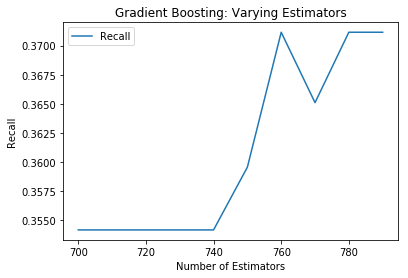

In [9]:
from matplotlib import pyplot as plt
from sklearn.metrics import recall_score
import numpy as np
X=wtp_features
y=wtp_class_labels
neighbors = np.arange(700,800,10)
recall_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    recall=[]
    for j in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=j)
        sc=StandardScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = GradientBoostingClassifier(n_estimators=k,random_state=0)
        knn.fit(scaledX_train,y_train)
        predicted = knn.predict(scaledX_test)
        recall.append(recall_score(y_test,predicted,average=None)[0])
    #Compute accuracy on the training set
    recall_plot[i] = np.mean(recall)
# Generate plot
plt.title('Gradient Boosting: Varying Estimators')
plt.plot(neighbors, recall_plot, label = 'Recall')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Recall')
plt.show()

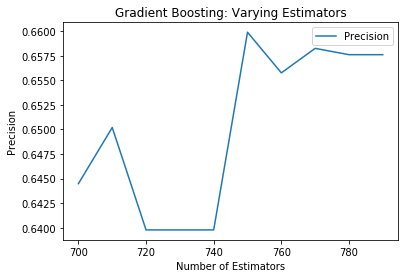

In [11]:
from matplotlib import pyplot as plt
from sklearn.metrics import precision_score
import numpy as np
neighbors = np.arange(700,800,10)
precision_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    precision=[]
    for j in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=j)
        sc=StandardScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = GradientBoostingClassifier(n_estimators=k,random_state=0)
        knn.fit(scaledX_train,y_train)
        predicted = knn.predict(scaledX_test)
        precision.append(precision_score(y_test,predicted,average=None)[0])
    #Compute accuracy on the training set
    precision_plot[i] = np.mean(precision)
# Generate plot
plt.title('Gradient Boosting: Varying Estimators')
plt.plot(neighbors, precision_plot, label = 'Precision')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Precision')
plt.show()

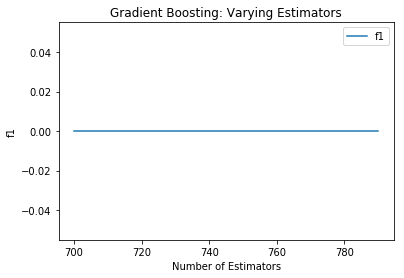

In [12]:
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score
import numpy as np
neighbors = np.arange(700, 800,10)
f1_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    f1=[]
    for j in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=j)
        sc=StandardScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,y_train)
        predicted = knn.predict(scaledX_test)
        f1.append(f1_score(y_test,predicted,average=None)[0])
    #Compute accuracy on the training set
    f1_plot[i] = np.mean(f1)
# Generate plot
plt.title('Gradient Boosting: Varying Estimators')
plt.plot(neighbors, f1_plot, label = 'f1')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('f1')
plt.show()

In [21]:
#With PCA
from sklearn.decomposition import PCA
pca=PCA()
X_train, X_test, y_train, y_test = train_test_split(wtp_features, wtp_class_labels, 
                                                                    test_size=0.3, random_state=42)
knn=GradientBoostingClassifier(n_estimators=700,random_state=0)
sc=StandardScaler()
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
# scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)
scaledX_train=pca.fit_transform(scaledX_train)
scaledX_test = pca.transform(scaledX_test)
knn.fit(scaledX_train,y_train)
print("What is the Testing Accuracy")
print(knn.score(scaledX_test,y_test))
print("What is the Training Accuracy")
print(knn.score(scaledX_train,y_train))
predicted = knn.predict(scaledX_test)
print(confusion_matrix(y_test,predicted))

What is the Testing Accuracy
0.7917948717948718
What is the Training Accuracy
0.9733890477237739
[[  15    2   37]
 [   1  515  202]
 [   5  159 1014]]


In [13]:
#First Split the Data

In [14]:
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
demo = pd.read_csv("pima-indians-diabetes.data", names= colnames)
X=demo.drop('class',axis=1)
y=demo['class']
demo.head()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)

In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# creating odd list of K for KNN
myList = list(range(1,100))
# empty list that will hold cv scores
cv_scores = []
k_neighbors = []
# perform 10-fold cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)

for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=20, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)
MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

The optimal number of neighbors is 31


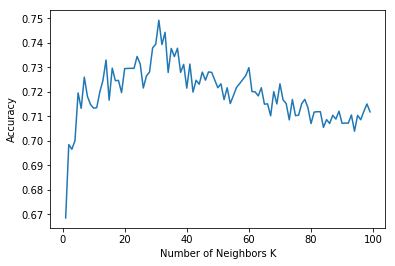

In [14]:
%matplotlib inline 
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(k_neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.show()

In [15]:
#Build Final Model
from sklearn.metrics import confusion_matrix
final = KNeighborsClassifier(n_neighbors=31)
final.fit(X_train,y_train)
predicted = final.predict(X_test)
confusion_matrix(y_test,predicted)

array([[90,  9],
       [26, 29]], dtype=int64)

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
# creating odd list of K for KNN
myList = list(range(1,100))
# empty list that will hold cv scores
cv_scores = []
max_depth = []
for k in myList:
    dt = DecisionTreeClassifier(max_depth=k)
    scores = cross_val_score(dt, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    max_depth.append(k)
MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of max_depth is %d" % best_k)

The optimal number of max_depth is 4


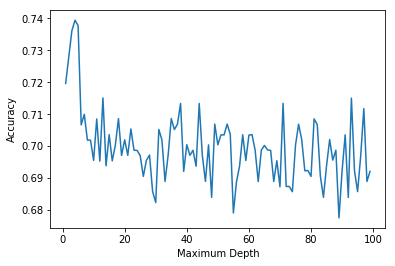

In [17]:
%matplotlib inline 
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(max_depth, cv_scores)
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.show()

In [18]:
#Build Final Model
from sklearn.metrics import confusion_matrix
final = DecisionTreeClassifier(max_depth=4)
final.fit(X_train,y_train)
predicted = final.predict(X_test)
confusion_matrix(y_test,predicted)

array([[85, 14],
       [20, 35]], dtype=int64)

In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
# creating odd list of K for KNN
myList = list(range(1,100))
# empty list that will hold cv scores
cv_scores = []
n_estimators = []
for k in myList:
    rf = RandomForestClassifier(n_estimators=k)
    scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    n_estimators.append(k)
MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of n_estimators is %d" % best_k)

The optimal number of n_estimators is 53


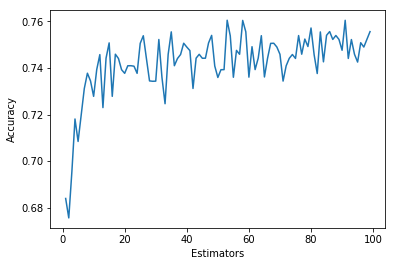

In [20]:
%matplotlib inline 
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(max_depth, cv_scores)
plt.xlabel('Estimators')
plt.ylabel('Accuracy')
plt.show()

In [21]:
#Build Final Model
from sklearn.metrics import confusion_matrix
final = RandomForestClassifier(n_estimators=43)
final.fit(X_train,y_train)
predicted = final.predict(X_test)
confusion_matrix(y_test,predicted)

array([[88, 11],
       [20, 35]], dtype=int64)

In [22]:
scoresrf = cross_val_score(final, X_train, y_train, cv=20, scoring='accuracy')

In [23]:
print("Bias Error")
print(1-np.mean(scoresrf))
print("Variance Error")
print(np.var(scoresrf,ddof=1))

Bias Error
0.2445396505376345
Variance Error
0.006949001213157439


In [33]:
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
demo = pd.read_csv("pima-indians-diabetes.data", names= colnames)
X=demo.drop('class',axis=1)
y=demo['class']
demo.head()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)
#Build Final Model
from sklearn.metrics import confusion_matrix
final = DecisionTreeClassifier()
final.fit(X_train,y_train)
predicted = final.predict(X_test)
confusion_matrix(y_test,predicted)

array([[77, 22],
       [26, 29]], dtype=int64)

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50)
scoresrf = cross_val_score(rf, X_train, y_train, cv=20)
print(scoresrf)

[0.8125     0.87096774 0.77419355 0.77419355 0.67741935 0.80645161
 0.90322581 0.74193548 0.70967742 0.64516129 0.80645161 0.83870968
 0.74193548 0.6        0.76666667 0.76666667 0.7        0.76666667
 0.7        0.66666667]


In [39]:
print("Bias Error")
print(1-np.mean(scoresrf))
print("Variance Error")
print(np.var(scoresrf))

Bias Error
0.24652553763440876
Variance Error
0.005524132621907158


In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
final=KNeighborsClassifier(n_neighbors=3)
scoresdt = cross_val_score(final, X_train, y_train, cv=20)
print(scoresdt)

[0.75       0.77419355 0.64516129 0.67741935 0.61290323 0.70967742
 0.77419355 0.67741935 0.67741935 0.70967742 0.80645161 0.83870968
 0.67741935 0.66666667 0.6        0.46666667 0.73333333 0.76666667
 0.8        0.56666667]


In [43]:
print("Bias Error")
print(1-np.mean(scoresdt))
print("Variance Error")
print(np.var(scoresdt))

Bias Error
0.30346774193548387
Variance Error
0.007777502456931438


In [31]:
# Grid Search for Algorithm Tuning
import numpy as np
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
# prepare a range of alpha values to test
neighbors = np.arange(1,100)
# create and fit a ridge regression model, testing each alpha
model = KNeighborsClassifier()
grid = GridSearchCV(cv=20,estimator=model, scoring='recall',param_grid=dict(n_neighbors=neighbors))
grid.fit(X_train, y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.n_neighbors)
print(grid.best_params_)

GridSearchCV(cv=20, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2, ..., 98, 99])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
0.749185667752443
31
{'n_neighbors': 31}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [28]:
#Build Final Model
from sklearn.metrics import confusion_matrix
final = KNeighborsClassifier(n_neighbors=31)
final.fit(X_train,y_train)
predicted = final.predict(X_test)
confusion_matrix(y_test,predicted)

array([[90,  9],
       [26, 29]], dtype=int64)

In [29]:
from sklearn.ensemble import BaggingClassifier
knn = KNeighborsClassifier(n_neighbors=1)
bg = BaggingClassifier(base_estimator=knn,n_estimators=50)
bg.fit(X_train,y_train)
predicted = bg.predict(X_test)
confusion_matrix(y_test,predicted)

array([[75, 24],
       [19, 36]], dtype=int64)

In [33]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# creating odd list of K for KNN
myList = list(range(1,100))
# empty list that will hold cv scores
cv_scores = []
k_neighbors = []
# perform 10-fold cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)

for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=20, scoring='roc_auc')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)
MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

The optimal number of neighbors is 60
